# Homework 6
## Hannah Dattilo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import astropy.io.fits as fits
import ccdproc as ccd
from astropy.nddata import CCDData
from astropy.modeling import models, fitting
from astropy.stats import mad_std
from astropy.stats import sigma_clip
import sys 
sys.path.insert(0,'/Users/hannahdattilo/Desktop/ASTR8060/ccd-reduction-and-photometry-guide/notebooks/')
from convenience_functions import show_image
import imexam
import os
from photutils.aperture import CircularAperture
from photutils.aperture import CircularAnnulus
from photutils.aperture import aperture_photometry
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from astropy.coordinates import SkyCoord
import sfdmap
import extinction

Ginga not installed, use other viewer, or no viewer


## 1: Using imexam, measure the PSF FWHM of one of the stars in the PG1633+099 Landolt standard field. Are there significant trends or variations in the FWHM for the same star observed at different times throughout the night? How about for different stars observed at similar times but for different airmasses? How about across the chip in a single exposure? Make plots to support your findings regarding the variation of the PSF with time/airmass/chip location.  

In [2]:
# paths
data_dir = '/Users/hannahdattilo/Desktop/ASTR8060/Imaging/'
reduced_dir = '/Users/hannahdattilo/Desktop/reduced_data/'

In [3]:
# read in reduced pg1633+099 v filter data
pg_v1 = [fits.open(reduced_dir + 'a0' + str(i) + 'otzb.fits')[0].data for i in np.arange(64,81,1)]
pg_v2 = [fits.open(reduced_dir + 'a0' + str(i) + 'otzb.fits')[0].data for i in np.arange(85,87,1)]
pg_v3 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(134,136,1)]
pg_v4 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(206,208,1)]
pg_v5 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(241,243,1)]

In [4]:
#os.environ['XPA_METHOD'] = "inet"
# connect the imexam viewer to that window
#viewer=imexam.connect(path='/Volumes/Macintosh HD/Applications/SAOImageDS9.app/Contents/MacOS/ds9')

In [5]:
# load an image and zscale
i = 85
#viewer.load_fits(reduced_dir + 'a0' + str(i) + 'otzb.fits')
#viewer.scale()

In [6]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [7]:
# found using imexam 
fwhm_v = np.array([4.286,3.606,5.090,6.916,4.375,3.767,4.681,3.786,3.966,4.016,5.454,4.482,4.589,4.589,5.958,4.939,3.966,4.243,4.457,5.333,5.053,3.884,3.583,5.094,4.772])

In [8]:
# obtain the times these images were taken at 
pg_header1 = [fits.open(data_dir + 'a0' + str(i) + '.fits')[0].header for i in np.arange(64,81,1)]
pg_header2 = [fits.open(data_dir + 'a0' + str(i) + '.fits')[0].header for i in np.arange(85,87,1)]
pg_header3 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(134,136,1)]
pg_header4 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(206,208,1)]
pg_header5 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(241,243,1)]

pg_header = pg_header1+pg_header2+pg_header3+pg_header4+pg_header5

pg_date = [i["DATE-OBS"] for i in pg_header]
pg_time = [i[11:23] for i in pg_date]

# convert h:m:s string to seconds, courtesy of a function found on stack overflow (god bless the internet)
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(float(s))

pg_time_sec = []
for i in pg_time:
    time = get_sec(i)
    pg_time_sec.append(time)
#print(pg_time_sec)

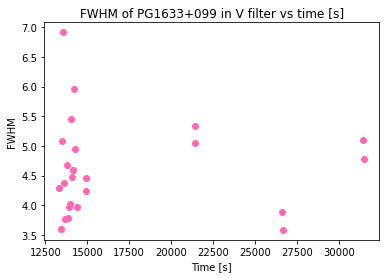

In [9]:
# plot FWHM of PG1633+099 over time to see what kind of time variation there is
plt.scatter(pg_time_sec,fwhm_v,color='hotpink')
plt.xlabel('Time [s]')
plt.ylabel('FWHM')
plt.title('FWHM of PG1633+099 in V filter vs time [s]')
plt.show()

There doesn't seem to be any significant patterns but there is certainly some variation in the FWHM over time. 

Let's look at the other filters to see if they show any variation: 

In [10]:
# u 
pg_u1 = [fits.open(reduced_dir + 'a0' + str(i) + 'otzb.fits')[0].data for i in np.arange(81,83,1)]
pg_u2 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(130,132,1)]
pg_u3 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(202,204,1)]

In [11]:
# load an image and zscale
#i = 203
#viewer.load_fits(reduced_dir + 'a' + str(i) + 'otzb.fits')
#viewer.scale()

In [12]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [13]:
# found using imexam 
fwhm_u = np.array([4.723,4.538,5.300,5.559,4.264,4.178])

In [14]:
# obtain the times these were taken at 
pg_u_header1 = [fits.open(data_dir + 'a0' + str(i) + '.fits')[0].header for i in np.arange(81,83,1)]
pg_u_header2 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(130,132,1)]
pg_u_header3 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(202,204,1)]

pg_u_header = pg_u_header1+pg_u_header2+pg_u_header3

pg_u_date = [i["DATE-OBS"] for i in pg_u_header]
pg_u_time = [i[11:23] for i in pg_u_date]

pg_u_time_sec = []
for i in pg_u_time:
    time = get_sec(i)
    pg_u_time_sec.append(time)
#print(pg_u_time_sec)

In [15]:
# b 
pg_b1 = [fits.open(reduced_dir + 'a0' + str(i) + 'otzb.fits')[0].data for i in np.arange(83,85,1)]
pg_b2 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(132,134,1)]
pg_b3 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(204,206,1)]
pg_b4 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(239,241,1)]

In [16]:
# load an image and zscale
#i = 240
#viewer.load_fits(reduced_dir + 'a' + str(i) + 'otzb.fits')
#viewer.scale()

In [17]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [18]:
# found using imexam 
fwhm_b = np.array([4.226,4.063,6.498,6.241,4.459,4.629,5.022,5.123])

In [19]:
# obtain the times these were taken at 
pg_b_header1 = [fits.open(data_dir + 'a0' + str(i) + '.fits')[0].header for i in np.arange(83,85,1)]
pg_b_header2 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(132,134,1)]
pg_b_header3 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(204,206,1)]
pg_b_header4 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(239,241,1)]

pg_b_header = pg_b_header1+pg_b_header2+pg_b_header3+pg_b_header4

pg_b_date = [i["DATE-OBS"] for i in pg_b_header]
pg_b_time = [i[11:23] for i in pg_b_date]

pg_b_time_sec = []
for i in pg_b_time:
    time = get_sec(i)
    pg_b_time_sec.append(time)
#print(pg_b_time_sec)

In [20]:
# r
pg_r1 = [fits.open(reduced_dir + 'a0' + str(i) + 'otzb.fits')[0].data for i in np.arange(87,89,1)]
pg_r2 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(136,138,1)]
pg_r3 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(208,210,1)]
pg_r4 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(243,245,1)]

In [21]:
# load an image and zscale
#i = 244
#viewer.load_fits(reduced_dir + 'a' + str(i) + 'otzb.fits')
#viewer.scale()

In [22]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [23]:
# found using imexam 
fwhm_r = np.array([4.131,4.101,3.672,3.878,3.258,3.307,4.413,4.310])

In [24]:
# obtain the times these were taken at 
pg_r_header1 = [fits.open(data_dir + 'a0' + str(i) + '.fits')[0].header for i in np.arange(87,89,1)]
pg_r_header2 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(136,138,1)]
pg_r_header3 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(208,210,1)]
pg_r_header4 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(243,245,1)]

pg_r_header = pg_r_header1+pg_r_header2+pg_r_header3+pg_r_header4

pg_r_date = [i["DATE-OBS"] for i in pg_r_header]
pg_r_time = [i[11:23] for i in pg_r_date]

pg_r_time_sec = []
for i in pg_r_time:
    time = get_sec(i)
    pg_r_time_sec.append(time)
#print(pg_r_time_sec)

In [25]:
# i 
pg_i1 = [fits.open(reduced_dir + 'a0' + str(i) + 'otzb.fits')[0].data for i in np.arange(89,91,1)]
pg_i2 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(138,140,1)]
pg_i3 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(210,212,1)]
pg_i4 = [fits.open(reduced_dir + 'a' + str(i) + 'otzb.fits')[0].data for i in np.arange(245,247,1)]

In [26]:
# load an image and zscale
#i = 246
#viewer.load_fits(reduced_dir + 'a' + str(i) + 'otzb.fits')
#viewer.scale()

In [27]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [28]:
# found using imexam 
fwhm_i = np.array([3.901,4.480,3.728,3.040,2.818,2.998,3.905,3.676])

In [29]:
# obtain the times these were taken at 
pg_i_header1 = [fits.open(data_dir + 'a0' + str(i) + '.fits')[0].header for i in np.arange(89,91,1)]
pg_i_header2 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(138,140,1)]
pg_i_header3 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(210,212,1)]
pg_i_header4 = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(245,247,1)]

pg_i_header = pg_i_header1+pg_i_header2+pg_i_header3+pg_i_header4

pg_i_date = [i["DATE-OBS"] for i in pg_i_header]
pg_i_time = [i[11:23] for i in pg_i_date]

pg_i_time_sec = []
for i in pg_i_time:
    time = get_sec(i)
    pg_i_time_sec.append(time)
#print(pg_i_time_sec)

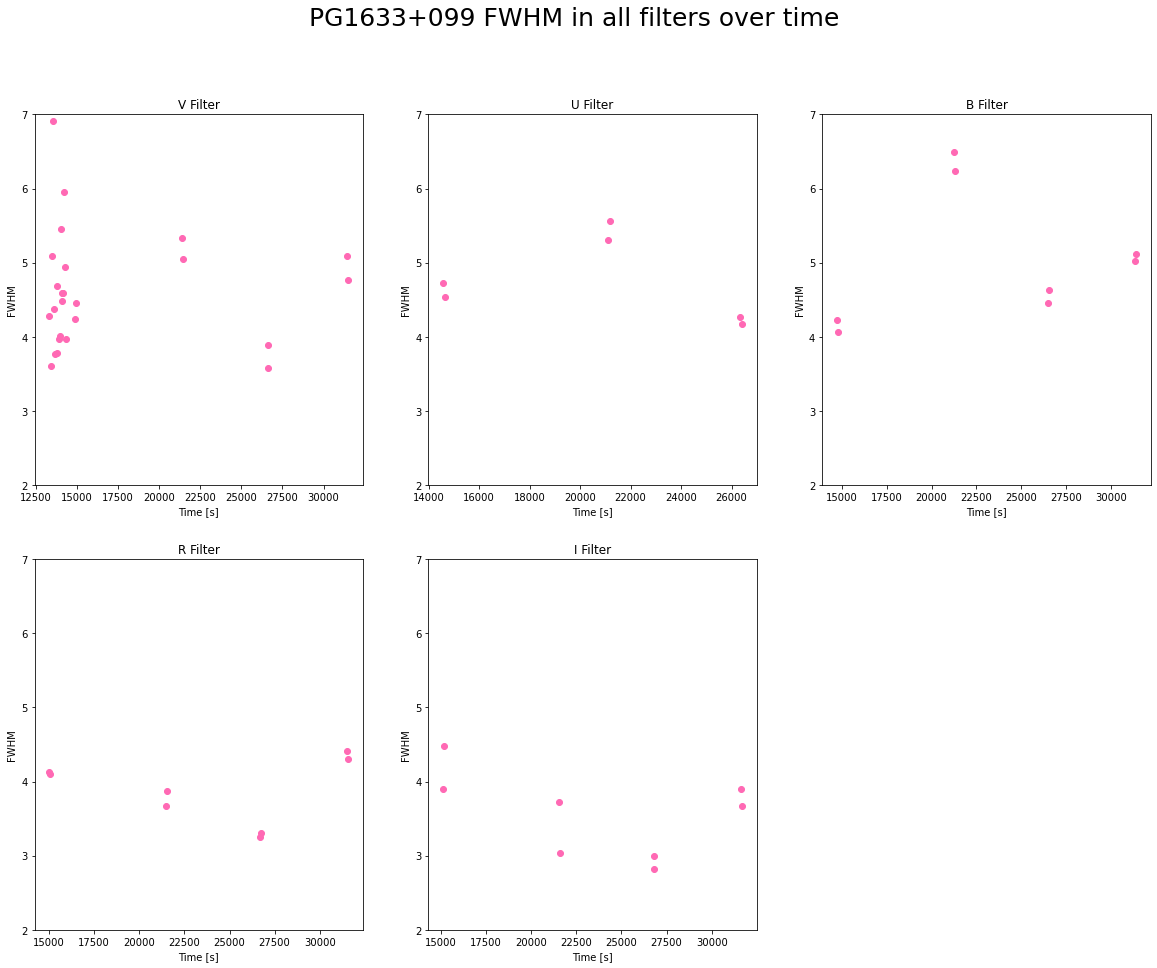

In [30]:
fig,ax = plt.subplots(2,3,figsize=(20,15))
fig.suptitle('PG1633+099 FWHM in all filters over time',size=25)
ax[0,0].scatter(pg_time_sec,fwhm_v,color='hotpink')
ax[0,0].set_title('V Filter')
ax[0,1].scatter(pg_u_time_sec,fwhm_u,color='hotpink')
ax[0,1].set_title('U Filter')
ax[0,2].scatter(pg_b_time_sec,fwhm_b,color='hotpink')
ax[0,2].set_title('B Filter')
ax[1,0].scatter(pg_r_time_sec,fwhm_r,color='hotpink')
ax[1,0].set_title('R Filter')
ax[1,1].scatter(pg_i_time_sec,fwhm_i,color='hotpink')
ax[1,1].set_title('I Filter')
ax[1,2].axis('off')

for a in ax.flat:
    a.set(xlabel='Time [s]', ylabel='FWHM')
    a.set(ylim=(2,7))

Again, no significant patterns over time for each filter or even across filters, but there is variation. 

### Let's look at all the PG1633+099 standard stars and compare them at different airmasses in the V filter:

In [31]:
# v
# load an image and zscale
#i = 242
#viewer.load_fits(reduced_dir + 'a' + str(i) + 'otzb.fits')
#viewer.scale()

In [32]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [33]:
# lets look at 2-3 frames from similar times and all the different airmasses: 
x1 = np.array([1.19,1.19,1.19,1.19,1.19,1.19,1.19,1.19,1.19])
#landolt standards: #a.   #b.   #c.   #d.  
x1_f1 = np.array([5.139,5.431,5.646,5.452])  # a074
x1_f2 = np.array([4.502,4.710,4.703,4.850])  # a075
x1_f3 = np.array([4.564,4.420,4.873,4.767])  # a076

x2 = np.array([1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24])
x2_f1 = np.array([4.994,5.438,4.443,4.569])  # a134
x2_f2 = np.array([4.799,5.454,4.485,4.485])  # a135

x3 = np.array([1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52])
x3_f1 = np.array([3.513,3.790,3.962,4.101])  # a206
x3_f2 = np.array([3.683,3.918,3.676,3.815])  # a207

x4 = np.array([2.21,2.21,2.21,2.21,2.21,2.21,2.21,2.21,2.21])
x4_f1 = np.array([4.993,5.076,5.075,5.103])  # a241
x4_f2 = np.array([4.609,4.574,4.600,4.653])  # a242

airmass = np.array([1.19,1.19,1.19,1.24,1.24,1.52,1.52,2.21,2.21]) 
# lets get the times these frames were taken at:
# obtain the times these were taken at 
x1_headers = [fits.open(data_dir + 'a0' + str(i) + '.fits')[0].header for i in np.arange(74,77,1)]
x2_headers = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(134,136,1)]
x3_headers = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(206,208,1)]
x4_headers = [fits.open(data_dir + 'a' + str(i) + '.fits')[0].header for i in np.arange(241,243,1)]

pg_header = x1_headers+x2_headers+x3_headers+x4_headers

pg_date = [i["DATE-OBS"] for i in pg_header]
pg_time = [i[11:23] for i in pg_date]


times = [] 
for i in pg_time:
    time = get_sec(i)
    times.append(time)
print(times)

[14055, 14086, 14121, 21398, 21433, 26619, 26654, 31447, 31482]


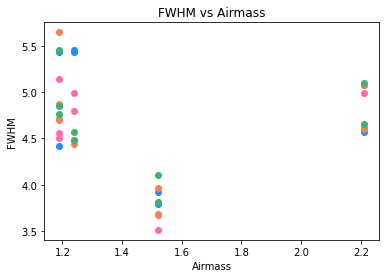

In [34]:
# lets plot these different objects 
plt.scatter(airmass,np.array([5.139,4.502,4.564,4.994,4.799,3.513,3.683,4.993,4.609]),color='hotpink')
plt.scatter(airmass,np.array([5.431,4.710,4.420,5.438,5.454,3.790,3.918,5.076,4.574]),color='dodgerblue')
plt.scatter(airmass,np.array([5.646,4.703,4.873,4.443,4.485,3.962,3.676,5.075,4.600]),color='coral')
plt.scatter(airmass,np.array([5.452,4.850,4.767,4.569,4.485,4.101,3.815,5.103,4.653]),color='mediumseagreen')
plt.xlabel('Airmass')
plt.ylabel('FWHM')
plt.title('FWHM vs Airmass')
plt.show()

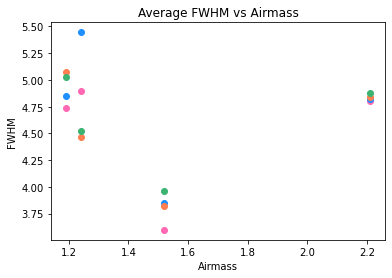

In [35]:
airmass_new = np.array([1.19,1.24,1.52,2.21])
plt.scatter(airmass_new,np.array([np.mean([5.139,4.502,4.564]),np.mean([4.994,4.799]),np.mean([3.513,3.683]),np.mean([4.993,4.609])]),color='hotpink')
plt.scatter(airmass_new,np.array([np.mean([5.431,4.710,4.420]),np.mean([5.438,5.454]),np.mean([3.790,3.918]),np.mean([5.076,4.574])]),color='dodgerblue')
plt.scatter(airmass_new,np.array([np.mean([5.646,4.703,4.873]),np.mean([4.443,4.485]),np.mean([3.962,3.676]),np.mean([5.075,4.600])]),color='coral')
plt.scatter(airmass_new,np.array([np.mean([5.452,4.850,4.767]),np.mean([4.569,4.485]),np.mean([4.101,3.815]),np.mean([5.103,4.653])]),color='mediumseagreen')
plt.xlabel('Airmass')
plt.ylabel('FWHM')
plt.title('Average FWHM vs Airmass')
plt.show()

These plots are a little weird because we would've expected the FWHM to decrease as airmass increases, but maybe there were some weird atmospheric things happening that caused the weird trend we got.

#### Across the chip in a single exposure: 
let's look at a bunch of different stars in different chip locations in a single frame and grab the FWHM for each star to see how the psf changes with chip locations:

In [36]:
# load an image and zscale
# look at a076 (exp_time = 8s), a077 (exp_time = 16s), a078 (exp_time = 32s), a079 (exp_time = 64s)
#i = 76
#viewer.load_fits(reduced_dir + 'a0' + str(i) + 'otzb.fits')
#viewer.scale()

In [37]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [38]:
fwhm = np.array([4.779,3.372,5.696,3.524,4.453,3.623,4.529,4.420,4.767,4.537,4.605,4.659,4.781,4.558,4.589,4.436,3.807,4.726,4.673,4.601,4.568,4.489,3.775,4.562,4.358,3.772,3.656,4.215,4.237,4.160])
x = np.array([330.7814,255.6294,620.3175,1510.7440,1346.1369,501.1057,996.7770,1260.0815,1452.4574,525.2033,274.8945,1358.0093,1595.1229,1234.5423,997.3774,909.2269,530.6656,138.4789,380.6320,438.8325,608.5834,811.5222,1367.3629,1931.0137,1705.9465,1539.3769,1414.7380,1225.0560,844.7216,23.2310])
y = np.array([1845.2638,1748.3192,1714.3152,1746.7129,1661.1078,1472.7433,1525.3146,1223.9071,1184.6184,1179.8153,952.8106,841.6127,872.4707,744.9123,1051.8861,736.1665,602.4787,579.4541,464.4020,414.3747,431.8141,461.8364,620.9516,275.7086,233.6821,190.1608,229.1105,281.3945,275.1177,72.9681])

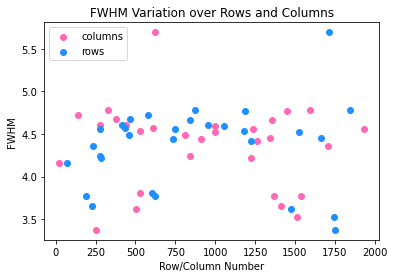

In [39]:
# plot fwhm across row and column pixels
plt.scatter(x,fwhm,color='hotpink',label='columns')
plt.scatter(y,fwhm,color='dodgerblue',label='rows')
plt.xlabel('Row/Column Number')
plt.ylabel('FWHM')
plt.title('FWHM Variation over Rows and Columns')
plt.legend()
plt.show()


The plot above shows the variation in FWHM over pixel rows and columns tends to happen towards the edges of the chip. The center of the chip (rows and columns 750-1250) have far less outliers so that region of the chip shows less variation over the pixels.

## 2: CCDs are ideal because of over the available dynamic range, they are very linear (that is, one photon produces one electron). Test the linearity of the CCD using the sequence of exposures labeled linearity test in the log. Make a plot of ADU versus time and determine whether the chip is linear to the full 16 bits of the A-D converter. What you care about here is whether the signal stays linear with exposure time as the flux in the peak pixel approaches the $2^{16}$ ADU limit. 

In [40]:
# read in linearity test frames
lin_test = [fits.open(reduced_dir + 'a0' + str(i) + 'otzb.fits')[0].data for i in np.arange(74,81,1)]
np.shape(lin_test)
max_count = []
for i in lin_test:
    max_count.append(np.max(i))
print(max_count)
exp_times = np.array([2,4,8,16,32,64,128])

[44869.26895760819, 66573.49857045177, 147661.21223328687, 292002.186040241, 592422.0742140663, 1175640.2689728895, 2410803.55731015]


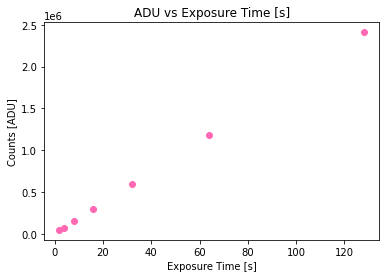

In [41]:
plt.scatter(exp_times,max_count,color='hotpink')
plt.xlabel('Exposure Time [s]')
plt.ylabel('Counts [ADU]')
plt.title('ADU vs Exposure Time [s]')
plt.show()

CCD *is* linear, shown by plot above.

## 3: Use photutils to perform aperture photometry on three (non saturated) stars in the PG1633+099 standard field: a really faint one, a medium bright one, and a bright one. Perform aperture photometry using at least 5 aperture sizes from very small to very large and make a plot that reproduces the one from Howell Figure 5.7 showing S/N as a function of aperture radius. What is a good aperture size to use for this dataset?

In [42]:
# load a085 image and zscale
#i = 86
#viewer.load_fits(reduced_dir + 'a0' + str(i) + 'otzb.fits')
#viewer.scale()

In [43]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [44]:
# define star positions and their respective mean background / pixel levels given by imexam 
bright = [(322.2055,1842.6761)]
bright_bkg = 191.09

med_bright = [(155.9362,1751.7733)]
med_bright_bkg = 129.77

dim = [(792.9555,1653.0102)]
dim_bkg = 123.52

In [45]:
# let's make 5 different apertures for each star, r = 1,2,4,8,12
bright_1 = CircularAperture(bright, r=1.)
bright_2 = CircularAperture(bright, r=4.)
bright_4 = CircularAperture(bright, r=8.)
bright_8 = CircularAperture(bright, r=12.)
bright_12 = CircularAperture(bright, r=16.)
bright_16 = CircularAperture(bright, r=25.)


med_bright_1 = CircularAperture(med_bright, r=1.)
med_bright_2 = CircularAperture(med_bright, r=4.)
med_bright_4 = CircularAperture(med_bright, r=8.)
med_bright_8 = CircularAperture(med_bright, r=12.)
med_bright_12 = CircularAperture(med_bright, r=16.)
med_bright_16 = CircularAperture(med_bright, r=25.)

dim_1 = CircularAperture(dim, r=1.)
dim_2 = CircularAperture(dim, r=4.)
dim_4 = CircularAperture(dim, r=8.)
dim_8 = CircularAperture(dim, r=12.)
dim_12 = CircularAperture(dim, r=16.)
dim_16 = CircularAperture(dim, r=25.)

# define annulus aperture around dim star for background calculation: 
annulus_aperture = CircularAnnulus(dim, r_in=10., r_out=15.)

In [46]:
# read in data 
data = fits.open(reduced_dir+'a085otzb.fits')[0].data

# apertures 
bright_apers = [bright_1,bright_2,bright_4,bright_8,bright_12,bright_16]
med_bright_apers = [med_bright_1,med_bright_2,med_bright_4,med_bright_8,med_bright_12,med_bright_16]
dim_apers = [dim_1,dim_2,dim_4,dim_8,dim_12,dim_16,annulus_aperture]

# apply aperture photometry 
phot_table_bright = aperture_photometry(data,bright_apers)
phot_table_med_bright = aperture_photometry(data,med_bright_apers)
phot_table_dim = aperture_photometry(data,dim_apers)
#print(phot_table_bright['aperture_sum_0'],phot_table_bright['aperture_sum_2'])

# calculate mean background level 
bkg_mean = phot_table_dim['aperture_sum_6'] / annulus_aperture.area
bkg_mean[0]

123.11056514320688

In [47]:
# lets calculate the total signal in each aperture using the eqn S = T - AB 
# where T: total # of counts in the aperture, A: # of pix in aperture, & B: background / pix
t_bright_1,t_bright_2,t_bright_4,t_bright_8,t_bright_12,t_bright_16 = phot_table_bright['aperture_sum_0'],phot_table_bright['aperture_sum_1'],phot_table_bright['aperture_sum_2'],phot_table_bright['aperture_sum_3'],phot_table_bright['aperture_sum_4'],phot_table_bright['aperture_sum_5']
t_med_bright_1,t_med_bright_2,t_med_bright_4,t_med_bright_8,t_med_bright_12,t_med_bright_16 = phot_table_med_bright['aperture_sum_0'],phot_table_med_bright['aperture_sum_1'],phot_table_med_bright['aperture_sum_2'],phot_table_med_bright['aperture_sum_3'],phot_table_med_bright['aperture_sum_4'],phot_table_med_bright['aperture_sum_5']
t_dim_1,t_dim_2,t_dim_4,t_dim_8,t_dim_12, t_dim_16 = phot_table_dim['aperture_sum_0'],phot_table_dim['aperture_sum_1'],phot_table_dim['aperture_sum_2'],phot_table_dim['aperture_sum_3'],phot_table_dim['aperture_sum_4'],phot_table_dim['aperture_sum_5']
print(t_bright_1)

bkg = 123.48

# bright star signal calculation 
s_bright_1 = t_bright_1 - (bright_1.area * bright_bkg)    
s_bright_2 = t_bright_2 - (bright_2.area * bright_bkg)   
s_bright_4 = t_bright_4 - (bright_4.area * bright_bkg)    
s_bright_8 = t_bright_8 - (bright_8.area * bright_bkg)    
s_bright_12 = t_bright_12 - (bright_12.area * bright_bkg) 
s_bright_16 = t_bright_16 - (bright_16.area * bright_bkg)

# medium bright star signal calculation
s_med_bright_1 = t_med_bright_1 - (med_bright_1.area * med_bright_bkg)
s_med_bright_2 = t_med_bright_2 - (med_bright_2.area * med_bright_bkg)
s_med_bright_4 = t_med_bright_4 - (med_bright_4.area * med_bright_bkg)
s_med_bright_8 = t_med_bright_8 - (med_bright_8.area * med_bright_bkg)
s_med_bright_12 = t_med_bright_12 - (med_bright_12.area * med_bright_bkg)
s_med_bright_16 = t_med_bright_16 - (med_bright_16.area * med_bright_bkg)

# dim star signal calculation
s_dim_1 = t_dim_1 - (dim_1.area * dim_bkg)
s_dim_2 = t_dim_2 - (dim_2.area * dim_bkg)
s_dim_4 = t_dim_4 - (dim_4.area * dim_bkg)
s_dim_8 = t_dim_8 - (dim_8.area * dim_bkg)
s_dim_12 = t_dim_12 - (dim_12.area * dim_bkg)
s_dim_16 = t_dim_16 - (dim_16.area * dim_bkg)

  aperture_sum_0  
------------------
196663.37466563852


In [48]:
# let's calculate the noise using the denominator of the S/N equation 
n_r = 4.5  # WIRO read noise from website

# bright star noise calculation 
bright_noise_1 = np.sqrt(s_bright_1 + (bright_1.area * (bright_bkg + n_r**2)))
bright_noise_2 = np.sqrt(s_bright_2 + (bright_2.area * (bright_bkg + n_r**2)))
bright_noise_4 = np.sqrt(s_bright_4 + (bright_4.area * (bright_bkg + n_r**2)))
bright_noise_8 = np.sqrt(s_bright_8 + (bright_8.area * (bright_bkg + n_r**2)))
bright_noise_12 = np.sqrt(s_bright_12 + (bright_12.area * (bright_bkg + n_r**2)))
bright_noise_16 = np.sqrt(s_bright_16 + (bright_16.area * (bright_bkg + n_r**2)))

# medium bright star noise calculation 
med_bright_noise_1 = np.sqrt(s_med_bright_1 + (med_bright_1.area * (med_bright_bkg + n_r**2)))
med_bright_noise_2 = np.sqrt(s_med_bright_2 + (med_bright_2.area * (med_bright_bkg + n_r**2)))
med_bright_noise_4 = np.sqrt(s_med_bright_4 + (med_bright_4.area * (med_bright_bkg + n_r**2)))
med_bright_noise_8 = np.sqrt(s_med_bright_8 + (med_bright_8.area * (med_bright_bkg + n_r**2)))
med_bright_noise_12 = np.sqrt(s_med_bright_12 + (med_bright_12.area * (med_bright_bkg + n_r**2)))
med_bright_noise_16 = np.sqrt(s_med_bright_16 + (med_bright_16.area * (med_bright_bkg + n_r**2)))

# dim star noise calculation 
dim_noise_1 = np.sqrt(s_dim_1 + (dim_1.area * (dim_bkg + n_r**2)))
dim_noise_2 = np.sqrt(s_dim_2 + (dim_2.area * (dim_bkg + n_r**2)))
dim_noise_4 = np.sqrt(s_dim_4 + (dim_4.area * (dim_bkg + n_r**2)))
dim_noise_8 = np.sqrt(s_dim_8 + (dim_8.area * (dim_bkg + n_r**2)))
dim_noise_12 = np.sqrt(s_dim_12 + (dim_12.area * (dim_bkg + n_r**2)))
dim_noise_16 = np.sqrt(s_dim_16 + (dim_16.area * (dim_bkg + n_r**2)))

In [49]:
# lets calculate S/N 
bright_sn = np.array([s_bright_1[0]/bright_noise_1[0],s_bright_2[0]/bright_noise_2[0],
                      s_bright_4[0]/bright_noise_4[0],s_bright_8[0]/bright_noise_8[0],
                      s_bright_12[0]/bright_noise_12[0],s_bright_16[0]/bright_noise_16[0]])
med_bright_sn = np.array([s_med_bright_1[0]/med_bright_noise_1[0],s_med_bright_2[0]/med_bright_noise_2[0],
                          s_med_bright_4[0]/med_bright_noise_4[0],s_med_bright_8[0]/med_bright_noise_8[0],
                          s_med_bright_12[0]/med_bright_noise_12[0],s_med_bright_16[0]/med_bright_noise_16[0]])
dim_sn = np.array([s_dim_1[0]/dim_noise_1[0],s_dim_2[0]/dim_noise_2[0],
                          s_dim_4[0]/dim_noise_4[0],s_dim_8[0]/dim_noise_8[0],
                          s_dim_12[0]/dim_noise_12[0],s_dim_16[0]/dim_noise_16[0]])

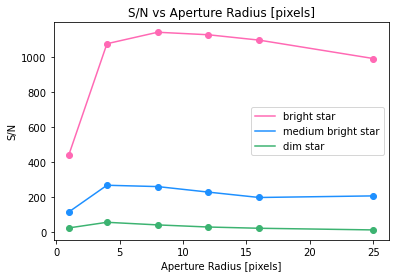

In [50]:
# plot S/N versus aperture size 
radius = np.array([1,4,8,12,16,25])
plt.plot(radius,bright_sn,color='hotpink',label='bright star')
plt.plot(radius,med_bright_sn,color='dodgerblue',label='medium bright star')
plt.plot(radius,dim_sn,color='mediumseagreen',label='dim star')
plt.scatter(radius,bright_sn,color='hotpink')
plt.scatter(radius,med_bright_sn,color='dodgerblue')
plt.scatter(radius,dim_sn,color='mediumseagreen')
plt.xlabel('Aperture Radius [pixels]')
plt.ylabel('S/N')
plt.title('S/N vs Aperture Radius [pixels]')
plt.legend()
plt.show()

The plot above doesn't look exactly like Howell 5.7 and the SNR values seem a bit high (maybe because I picked a *very* bright star), but the general idea is there. It looks like a radius of ~8 pixels fits this dataset best. Something to note is how the medium bright star follows the general trend of a decreasing SNR, but it goes up a little bit when r=25 pixels and I believe this is because there is another medium bright star about 20 pixels away from the medium bright star I chose, so that weird outlier is reasonable and we can just ignore it. 

## 4: Identify the standard stars in the PG1633+099 frame from Landolt (1992).

In [51]:
# Landolt Standard Star positions from Landolt (1992) and imexam:
# PG1633 +099 position: 
o_position = [(988.8693,1049.2816)]
o_bkg = 138.14
# PG1633 +099A position: 
a_position = [(1044.8043,1043.2177)]
a_bkg = 128.62
# PG1633 +099B position:
b_position = [(1251.6689,1221.4301)]
b_bkg = 173.73
# PG1633 +099C position: 
c_position = [(1363.9824,1230.9676)]
c_bkg = 162
# PG1633 +099D position: 
d_position = [(1444.0142,1182.0363)]
d_bkg = 150.58

## 5: Extract instrumental magnitudes for all of your standard stars using an approach that you’ve advocated for as best you can in the questions above.

To get the instrumental magnitudes, we can work with the information we get from imexam to solve for the rate of photons, then convert that to a flux, and then that to a magnitude. 
Problem 3 tells us a radius of 8 pixels if best for this dataset, so we'll use that. We also know from problem 2 that the CCD chip is linear, so we know that one photon releases one electron, which makes it easy for us to get the rate of photons. 

In [52]:
def snr(position,radius,data,bkg,read_noise):
    """
    This function calculates the total signal and S/N of a source given its position, aperture radius, image data,
    background level, and read noise. 
    params:
    -position: position of source in image
    -radius: aperture radius
    -data: image data
    -bkg: background level [counts/pix]
    -read_noise: read noise of telescope
    returns:
    -total_signal: total source signal given in ADU counts
    -sn_ratio: S/N of source
    """
    aperture = CircularAperture(position, r=int(radius))
    phot_table = aperture_photometry(data,aperture)
    total_counts = phot_table['aperture_sum']
    aperture_bkg = aperture.area * bkg
    total_signal = total_counts - aperture_bkg
    total_noise = np.sqrt(total_signal + (aperture.area * (bkg + read_noise**2)))
    sn_ratio = total_signal[0]/total_noise[0]
    return total_signal, sn_ratio

In [53]:
def rs(total_signal, exp_time, gain):
    """
    This function returns the rate of photons per second of a specific source given a total signal, an exposure 
    time, and the gain. 
    params:
    -total_signal: total source signal given in ADU counts
    -exp_time: exposure time of image
    -gain: gain of the telescope
    returns:
    -photon_rate: rate of photons per second in the aperture
    """
    count_rate = total_signal / exp_time  # rate of counts per second
    photon_rate = count_rate[0] * gain  # use gain to get rate of photons per second (assuming 1 electron = 1 photon, supported by #2)
    return photon_rate

In [54]:
def flux(rs,qe,bandwidth,aperture_radius,filter_wavelength):
    """
    This function calculates the flux in Jy of a specified source given the rate of photons, the efficiency of the 
    instrument, the filter bandwidth, the aperture radius of the telescope, and the central filter wavelength.
    params:
    -rs: rate of photons per second
    -qe: efficiency of telescope
    -bandwidth: filter bandwidth [Angstrom]
    -aperture_radius: the radius of the telescope aperture [cm]
    -filter_wavelength: central wavelength of the filter [Angstrom]
    returns:
    -flux_jy: the flux of the source [Jy]
    """
    # calculate flux 
    flux_ph_s = rs / (qe*bandwidth*np.pi*(aperture_radius**2))  # flux [ph/s/cm^2/angstrom^2]
    # how many erg / photon 
    e_ph = (6.624e-27 * 3e18) / filter_wavelength
    # photon --> erg
    flux_erg_s_ang = flux_ph_s * e_ph
    # how many hz in an angstrom
    hz_ang = 3e18 / (filter_wavelength**2)  # hz/angstrom
    # per angstrom --> per hz
    flux_erg_s_hz = flux_erg_s_ang / hz_ang
    # 10^-23 erg / s / cm^2 / Hz --> 1 Jy 
    flux_jy = flux_erg_s_hz / 10e-23
    
    return flux_jy

In [55]:
def mag(flux,zero_point):
    """
    This function calculates a magnitude given a flux and a zero_point wavelength. 
    params:
    -flux: flux of the source [Jy]
    -zero_point: Vega zero point flux [Jy
    returns:
    -m: magnitude]
    """
    m = -2.5 * np.log10(flux/zero_point)
    return m 

In [56]:
# calculate the magnitudes of the Landolt standard stars at x=1.18
print('Frame a085')

# PG1633+099
ts_o, snr_o = snr(o_position,8,data,o_bkg,n_r)
rs_o = rs(ts_o,20,2)
flux_o = flux(rs_o,1,980,115,5600)
mag_o = mag(flux_o,3540)
print('PG1633+099: ',mag_o)

# PG1633+099A
ts_a, snr_a = snr(a_position,8,data,a_bkg,n_r)
rs_a = rs(ts_a,20,2)
flux_a = flux(rs_a,1,980,115,5600)
mag_a = mag(flux_a,3540)
print('PG1633+099A: ',mag_a)

# PG1633+099B
ts_b, snr_b = snr(b_position,8,data,b_bkg,n_r)
rs_b = rs(ts_b,20,2)
flux_b = flux(rs_b,1,980,115,5600)
mag_b = mag(flux_b,3540)
print('PG1633+099B:',mag_b)

# PG1633+099C
ts_c, snr_c = snr(c_position,8,data,c_bkg,n_r)
rs_c = rs(ts_c,20,2)
flux_c = flux(rs_c,1,980,115,5600)
mag_c = mag(flux_c,3540)
print('PG1633+099C:',mag_c)

# PG1633+099D
ts_d, snr_d = snr(d_position,8,data,d_bkg,n_r)
rs_d = rs(ts_d,20,2)
flux_d = flux(rs_d,1,980,115,5600)
mag_d = mag(flux_d,3540)
print('PG1633+099D:',mag_d)

Frame a085
PG1633+099:  17.78114200616227
PG1633+099A:  18.713394766119563
PG1633+099B: 16.437674333056954
PG1633+099C: 16.69984839800342
PG1633+099D: 17.118448736916218


## 6: Plot your standard star instrumental magnitudes versus their airmass (or since you have many different standard stars taken at different airmass, plot the difference between the accepted magnitude and your instrumental magnitude versus airmass). Use one of the linear fitting routines in Python to do a least squares fit to find and plot the extinction coefficients at each filter. You can find their magnitudes and colors in Landolt (1992).

### V filter: 

In [57]:
# v frames with 4 different airmasses
data = fits.open(reduced_dir+'a085otzb.fits')[0].data # already done in problem 5
data86 = fits.open(reduced_dir+'a086otzb.fits')[0].data 
data134 = fits.open(reduced_dir+'a134otzb.fits')[0].data
data206 = fits.open(reduced_dir+'a206otzb.fits')[0].data
data241 = fits.open(reduced_dir+'a241otzb.fits')[0].data

In [58]:
# load an image and zscale
#V filter: a085 (x=1.18), a134 (x=1.24), a206 (x=1.52), a241 (x=2.21)
#i = 241
#viewer.load_fits(reduced_dir + 'a' + str(i) + 'otzb.fits')
#viewer.scale()

In [59]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [60]:
# a134, x = 1.24
bkg134, bkg134a, bkg134b, bkg134c, bkg134d = 60.54, 56.29, 77.56, 71.10, 65.39
print('Frame 134')

# PG1633+099A
o_position_134 = [(931.8114,1043.4527)]
ts_134o, snr_134o = snr(o_position_134,8,data134,bkg134,n_r)
rs_134o = rs(ts_134o,10,2)
flux_134o = flux(rs_134o,1,980,115,5600)
mag_134o = mag(flux_134o,3540)
print('PG1633+099: ',mag_134o)

# PG1633+099A
a_position_134 = [(987.6935,1037.3559)]
ts_134a, snr_134a = snr(a_position_134,8,data134,bkg134a,n_r)
rs_134a = rs(ts_134a,10,2)
flux_134a = flux(rs_134a,1,980,115,5600)
mag_134a = mag(flux_134a,3540)
print('PG1633+099A: ',mag_134a)

# PG1633+099B
b_position_134 = [(1194.6649,1215.5003)]
ts_134b, snr_134b = snr(b_position_134,8,data134,bkg134b,n_r)
rs_134b = rs(ts_134b,10,2)
flux_134b = flux(rs_134b,1,980,115,5600)
mag_134b = mag(flux_134b,3540)
print('PG1633+099B:',mag_134b)

# PG1633+099C
c_position_134 = [(1307.0203,1225.0279)]
ts_134c, snr_134c = snr(c_position_134,8,data134,bkg134c,n_r)
rs_134c = rs(ts_134c,10,2)
flux_134c = flux(rs_134c,1,980,115,5600)
mag_134c = mag(flux_134c,3540)
print('PG1633+099C:',mag_134c)

# PG1633+099D
d_position_134 = [(1386.9958,1176.1045)]
ts_134d, snr_134d = snr(d_position_134,8,data134,bkg134d,n_r)
rs_134d = rs(ts_134d,10,2)
flux_134d = flux(rs_134d,1,980,115,5600)
mag_134d = mag(flux_134d,3540)
print('PG1633+099D:',mag_134d)


Frame 134
PG1633+099:  17.77645717313613
PG1633+099A:  18.713859302649837
PG1633+099B: 16.44008951596041
PG1633+099C: 16.696431494288
PG1633+099D: 17.116149471526736


In [61]:
# a206, x = 1.52
bkg206, bkg206a, bkg206b, bkg206c, bkg206d = 65.05, 60.88, 79.35, 75.32, 69.61
print('Frame a206')

# PG1633+099A
o_position_206 = [(924.4200,1037.0850)]
ts_206o, snr_206o = snr(o_position_206,8,data206,bkg206,n_r)
rs_206o = rs(ts_206o,10,2)
flux_206o = flux(rs_206o,1,980,115,5380)
mag_206o = mag(flux_206o,3540)
print('PG1633+099: ',mag_206o)

# PG1633+099A
a_position_206 = [(980.2808,1030.9913)]
ts_206a, snr_206a = snr(a_position_206,8,data206,bkg206a,n_r)
rs_206a = rs(ts_206a,10,2)
flux_206a = flux(rs_206a,1,980,115,5380)
mag_206a = mag(flux_206a,3540)
print('PG1633+099A: ',mag_206a)

# PG1633+099B
b_position_206 = [(1187.3291,1208.8482)]
ts_206b, snr_206b = snr(b_position_206,8,data206,bkg206b,n_r)
rs_206b = rs(ts_206b,10,2)
flux_206b = flux(rs_206b,1,980,115,5380)
mag_206b = mag(flux_206b,3540)
print('PG1633+099B:',mag_206b)

# PG1633+099C
c_position_206 = [(1299.5210,1218.2870)]
ts_206c, snr_206c = snr(c_position_206,8,data206,bkg206c,n_r)
rs_206c = rs(ts_206c,10,2)
flux_206c = flux(rs_206c,1,980,115,5380)
mag_206c = mag(flux_206c,3540)
print('PG1633+099C:',mag_206c)

# PG1633+099D
d_position_206 = [(1379.4238,1169.3869)]
ts_206d, snr_206d = snr(d_position_206,8,data206,bkg206d,n_r)
rs_206d = rs(ts_206d,10,2)
flux_206d = flux(rs_206d,1,980,115,5380)
mag_206d = mag(flux_206d,3540)
print('PG1633+099D:',mag_206d)



Frame a206
PG1633+099:  17.85681427290846
PG1633+099A:  18.79273456047834
PG1633+099B: 16.521630928170122
PG1633+099C: 16.781170849568376
PG1633+099D: 17.198233141881964


In [62]:
# a241, x = 1.21
print('Frame a241')

bkg241, bkg241a, bkg241b, bkg241c, bkg241d = 90.59, 84.97, 107.86, 103.26, 96.10

# PG1633+099
o_position_241 = [(838.3983,1039.8686)]
ts_241o, snr_241o = snr(o_position_241,8,data241,bkg241,n_r)
rs_241o = rs(ts_241o,10,2)
flux_241o = flux(rs_241o,1,980,115,5600)
mag_241o = mag(flux_241o,3540)
print('PG1633+099: ',mag_241o)

# PG1633+099A
a_position_241 = [(894.1723,1033.8103)]
ts_241a, snr_241a = snr(a_position_241,8,data241,bkg241a,n_r)
rs_241a = rs(ts_241a,10,2)
flux_241a = flux(rs_241a,1,980,115,5600)
mag_241a = mag(flux_241a,3540)
print('PG1633+099A: ',mag_241a)

# PG1633+099B
b_position_241 = [(1101.0419,1211.7487)]
ts_241b, snr_241b = snr(b_position_241,8,data241,bkg241b,n_r)
rs_241b = rs(ts_241b,10,2)
flux_241b = flux(rs_241b,1,980,115,5600)
mag_241b = mag(flux_241b,3540)
print('PG1633+099B:',mag_241b)

# PG1633+099C
c_position_241 = [(1213.2665,1221.1236)]
ts_241c, snr_241c = snr(c_position_241,8,data241,bkg241c,n_r)
rs_241c = rs(ts_241c,10,2)
flux_241c = flux(rs_241c,1,980,115,5600)
mag_241c = mag(flux_241c,3540)
print('PG1633+099C:',mag_241c)

# PG1633+099D
d_position_241 = [(1293.3106,1172.1290)]
ts_241d, snr_241d = snr(d_position_241,8,data241,bkg241d,n_r)
rs_241d = rs(ts_241d,10,2)
flux_241d = flux(rs_241d,1,980,115,5600)
mag_241d = mag(flux_241d,3540)
print('PG1633+099D:',mag_241d)

Frame a241
PG1633+099:  17.94442240563982
PG1633+099A:  18.884510465220792
PG1633+099B: 16.598193070863875
PG1633+099C: 16.863655962888842
PG1633+099D: 17.281472418066464


In [63]:
# 85
pg_ov = np.array([mag_o,mag_134o,mag_206o,mag_241o])  
pg_av = np.array([mag_a,mag_134a,mag_206a,mag_241a])
pg_bv = np.array([mag_b,mag_134b,mag_206b,mag_241b])
pg_cv = np.array([mag_c,mag_134c,mag_206c,mag_241c])
pg_dv = np.array([mag_d,mag_134d,mag_206d,mag_241d])

In [64]:
airmass_new = np.array([1.18,1.24,1.52,2.21])
abs_mvo = np.array([14.397])
abs_mva = np.array([15.256])
abs_mvb = np.array([12.969])
abs_mvc = np.array([13.299])
abs_mvd = np.array([13.691])

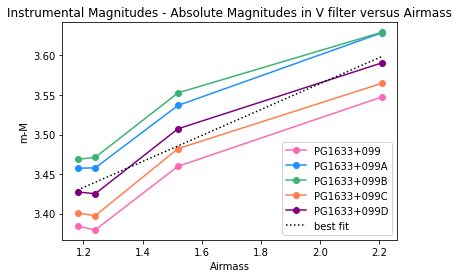

Extinction Coefficient for V: 0.16381551128618055


In [65]:
plt.plot(airmass_new,pg_ov-abs_mvo,color='hotpink',label='PG1633+099',marker='o')
plt.plot(airmass_new,pg_av-abs_mva,color='dodgerblue',label='PG1633+099A',marker='o')
plt.plot(airmass_new,pg_bv-abs_mvb,color='mediumseagreen',label='PG1633+099B',marker='o')
plt.plot(airmass_new,pg_cv-abs_mvc,color='coral',label='PG1633+099C',marker='o')
plt.plot(airmass_new,pg_dv-abs_mvd,color='purple',label='PG1633+099D',marker='o')
# calculate extinction coefficient:
m86avg = np.mean([mag_o-abs_mvo,mag_a-abs_mva,mag_b-abs_mvb,mag_c-abs_mvc,mag_d-abs_mvd]) 
m134avg = np.mean([mag_134o-abs_mvo,mag_134a-abs_mva,mag_134b-abs_mvb,mag_134c-abs_mvc,mag_134d-abs_mvd]) 
m206avg = np.mean([mag_206o-abs_mvo,mag_206a-abs_mva,mag_206b-abs_mvb,mag_206c-abs_mvc,mag_206d-abs_mvd]) 
m241avg = np.mean([mag_241o-abs_mvo,mag_241a-abs_mva,mag_241b-abs_mvb,mag_241c-abs_mvc,mag_241d-abs_mvd]) 
extinc_coeff, b = np.polyfit(airmass_new,np.array([m86avg,m134avg,m206avg,m241avg]),deg=1)
plt.plot(airmass_new, extinc_coeff*airmass_new+b,linestyle='dotted',color='k',label='best fit')
plt.xlabel('Airmass')
plt.ylabel('m-M')
plt.title('Instrumental Magnitudes - Absolute Magnitudes in V filter versus Airmass')
plt.legend()
plt.show()
print('Extinction Coefficient for V:', extinc_coeff)

### U Filter

In [66]:
# u frames with 4 different airmasses
data82 = fits.open(reduced_dir+'a082otzb.fits')[0].data   # x = 1.18
data131 = fits.open(reduced_dir+'a131otzb.fits')[0].data  # x = 1.24
data202 = fits.open(reduced_dir+'a202otzb.fits')[0].data  # x = 1.49

airmass_u = np.array([1.18,1.24,1.49])

In [67]:
# load an image and zscale
#i = 82
#viewer.load_fits(reduced_dir + 'a0' + str(i) + 'otzb.fits')
#viewer.scale()

In [68]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [69]:
# a082, x = 1.18
print('Frame a082')

bkg82, bkg82a, bkg82b, bkg82c, bkg82d = 38.86, 31.65, 32.92, 32.18, 35.01

# PG1633+099
o_position_82 = [(990.7649,1048.7891)]
ts_82o, snr_82o = snr(o_position_82,8,data82,bkg82,n_r)
rs_82o = rs(ts_82o,60,2)
flux_82o = flux(rs_82o,1,700,115,3640)
mag_82o = mag(flux_82o,1790)
print('PG1633+099: ',mag_82o)

# PG1633+099A
a_position_82 = [(1046.6186,1042.8799)]
ts_82a, snr_82a = snr(a_position_82,8,data82,bkg82a,n_r)
rs_82a = rs(ts_82a,60,2)
flux_82a = flux(rs_82a,1,700,115,3640)
mag_82a = mag(flux_82a,1790)
print('PG1633+099A: ',mag_82a)

# PG1633+099B
b_position_82 = [(1253.3659,1220.8600)]
ts_82b, snr_82b = snr(b_position_82,8,data82,bkg82b,n_r)
rs_82b = rs(ts_82b,60,2)
flux_82b = flux(rs_82b,1,700,115,3640)
mag_82b = mag(flux_82b,1790)
print('PG1633+099B:',mag_82b)

# PG1633+099C
c_position_82 = [(1365.6294,1230.4990)]
ts_82c, snr_82c = snr(c_position_82,8,data82,bkg82c,n_r)
rs_82c = rs(ts_82c,60,2)
flux_82c = flux(rs_82c,1,700,115,3640)
mag_82c = mag(flux_82c,1790)
print('PG1633+099C:',mag_82c)

# PG1633+099D
d_position_82 = [(1445.5867,1181.4573)]
ts_82d, snr_82d = snr(d_position_82,8,data82,bkg82d,n_r)
rs_82d = rs(ts_82d,60,2)
flux_82d = flux(rs_82d,1,700,115,3640)
mag_82d = mag(flux_82d,1790)
print('PG1633+099D:',mag_82d)

Frame a082
PG1633+099:  18.922737754014324
PG1633+099A:  21.87756103827791
PG1633+099B: 20.399526608288046
PG1633+099C: 20.81048917873371
PG1633+099D: 19.66404784032356


In [70]:
# a131, x = 1.24
print('Frame a131')

bkg131, bkg131a, bkg131b, bkg131c, bkg131d = 32.40, 25.49, 27.11, 25.70, 28.09

# PG1633+099
o_position_131 = [(932.5169,1042.7109)]
ts_131o, snr_131o = snr(o_position_131,8,data131,bkg131,n_r)
rs_131o = rs(ts_131o,60,2)
flux_131o = flux(rs_131o,1,700,115,3640)
mag_131o = mag(flux_131o,1790)
print('PG1633+099: ',mag_131o)

# PG1633+099A
a_position_131 = [(988.3426,1036.7606)]
ts_131a, snr_131a = snr(a_position_131,8,data131,bkg131a,n_r)
rs_131a = rs(ts_131a,60,2)
flux_131a = flux(rs_131a,1,700,115,3640)
mag_131a = mag(flux_131a,1790)
print('PG1633+099A: ',mag_131a)

# PG1633+099B
b_position_131 = [(1195.1758,1214.7985)]
ts_131b, snr_131b = snr(b_position_131,8,data131,bkg131b,n_r)
rs_131b = rs(ts_131b,60,2)
flux_131b = flux(rs_131b,1,700,115,3640)
mag_131b = mag(flux_131b,1790)
print('PG1633+099B:',mag_131b)

# PG1633+099C
c_position_131 = [(1307.4158,1224.3034)]
ts_131c, snr_131c = snr(c_position_131,8,data131,bkg131c,n_r)
rs_131c = rs(ts_131c,60,2)
flux_131c = flux(rs_131c,1,700,115,3640)
mag_131c = mag(flux_131c,1790)
print('PG1633+099C:',mag_131c)

# PG1633+099D
d_position_131 = [(1387.4306,1175.2736)]
ts_131d, snr_131d = snr(d_position_131,8,data131,bkg131d,n_r)
rs_131d = rs(ts_131d,60,2)
flux_131d = flux(rs_131d,1,700,115,3640)
mag_131d = mag(flux_131d,1790)
print('PG1633+099D:',mag_131d)

Frame a131
PG1633+099:  18.95379148709803
PG1633+099A:  21.918161702327488
PG1633+099B: 20.42121099978772
PG1633+099C: 20.829324388657025
PG1633+099D: 19.686731134420302


In [71]:
# a202, x = 1.49
print('Frame a202')

bkg202, bkg202a, bkg202b, bkg202c, bkg202d = 31.64, 25.54, 27.06, 26.29, 28.76

# PG1633+099
o_position_202 = [(924.5755,1036.3678)]
ts_202o, snr_202o = snr(o_position_202,8,data202,bkg202,n_r)
rs_202o = rs(ts_202o,60,2)
flux_202o = flux(rs_202o,1,700,115,3640)
mag_202o = mag(flux_202o,1790)
print('PG1633+099: ',mag_202o)

# PG1633+099A
a_position_202 = [(980.3126,1030.3654)]
ts_202a, snr_202a = snr(a_position_202,8,data202,bkg202a,n_r)
rs_202a = rs(ts_202a,60,2)
flux_202a = flux(rs_202a,1,700,115,3640)
mag_202a = mag(flux_202a,1790)
print('PG1633+099A: ',mag_202a)

# PG1633+099B
b_position_202 = [(1187.2128,1208.3025)]
ts_202b, snr_202b = snr(b_position_202,8,data202,bkg202b,n_r)
rs_202b = rs(ts_202b,60,2)
flux_202b = flux(rs_202b,1,700,115,3640)
mag_202b = mag(flux_202b,1790)
print('PG1633+099B:',mag_202b)

# PG1633+099C
c_position_202 = [(1299.4304,1217.7813)]
ts_202c, snr_202c = snr(c_position_202,8,data202,bkg202c,n_r)
rs_202c = rs(ts_202c,60,2)
flux_202c = flux(rs_202c,1,700,115,3640)
mag_202c = mag(flux_202c,1790)
print('PG1633+099C:',mag_202c)

# PG1633+099D
d_position_202 = [(1379.4295,1168.6927)]
ts_202d, snr_202d = snr(d_position_202,8,data202,bkg202d,n_r)
rs_202d = rs(ts_202d,60,2)
flux_202d = flux(rs_202d,1,700,115,3640)
mag_202d = mag(flux_202d,1790)
print('PG1633+099D:',mag_202d)

Frame a202
PG1633+099:  19.061440312519892
PG1633+099A:  22.04609534452638
PG1633+099B: 20.525241836397026
PG1633+099C: 20.919087165340258
PG1633+099D: 19.799814170840268


In [72]:
pg_ou = np.array([mag_82o,mag_131o,mag_202o])  
pg_au = np.array([mag_82a,mag_131a,mag_202a])
pg_bu = np.array([mag_82b,mag_131b,mag_202b])
pg_cu = np.array([mag_82c,mag_131c,mag_202c])
pg_du = np.array([mag_82d,mag_131d,mag_202d])

In [73]:
abs_muo = np.array([14.397-0.192-0.974])
abs_mua = np.array([15.256+0.873+0.320])
abs_mub = np.array([12.969+1.081+1.007])
abs_muc = np.array([13.299+1.134+1.138])
abs_mud = np.array([13.691+0.535-0.025])

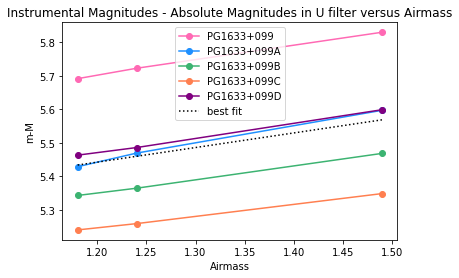

Extinction Coefficient for U: 0.16381551128618055


In [74]:
plt.plot(airmass_u,pg_ou-abs_muo,color='hotpink',label='PG1633+099',marker='o')
plt.plot(airmass_u,pg_au-abs_mua,color='dodgerblue',label='PG1633+099A',marker='o')
plt.plot(airmass_u,pg_bu-abs_mub,color='mediumseagreen',label='PG1633+099B',marker='o')
plt.plot(airmass_u,pg_cu-abs_muc,color='coral',label='PG1633+099C',marker='o')
plt.plot(airmass_u,pg_du-abs_mud,color='purple',label='PG1633+099D',marker='o')
# calculate extinction coefficient:
m82avg = np.mean([mag_82o-abs_muo,mag_82a-abs_mua,mag_82b-abs_mub,mag_82c-abs_muc,mag_82d-abs_mud]) 
m131avg = np.mean([mag_131o-abs_muo,mag_131a-abs_mua,mag_131b-abs_mub,mag_131c-abs_muc,mag_131d-abs_mud]) 
m202avg = np.mean([mag_202o-abs_muo,mag_202a-abs_mua,mag_202b-abs_mub,mag_202c-abs_muc,mag_202d-abs_mud])  
extinc_coeff_u, bu = np.polyfit(airmass_u,np.array([m82avg,m131avg,m202avg]),deg=1)
#extinc_coeff_u, bu = np.polyfit(airmass_u,pg_du-abs_mud,deg=1)
plt.plot(airmass_u, extinc_coeff_u*airmass_u+bu,linestyle='dotted',color='k',label='best fit')
plt.xlabel('Airmass')
plt.ylabel('m-M')
plt.title('Instrumental Magnitudes - Absolute Magnitudes in U filter versus Airmass')
plt.legend()
plt.show()
print('Extinction Coefficient for U:', extinc_coeff)

### B Filter

In [75]:
# b frames with 4 different airmasses
data83 = fits.open(reduced_dir+'a083otzb.fits')[0].data   # x = 1.18
data132 = fits.open(reduced_dir+'a131otzb.fits')[0].data  # x = 1.24
data204 = fits.open(reduced_dir+'a204otzb.fits')[0].data  # x = 1.51
data239 = fits.open(reduced_dir+'a239otzb.fits')[0].data  # x = 2.19

#airmass_b = np.array([1.18,1.24,1.51,2.19])
airmass_b = np.array([1.18,1.51,2.19])

In [76]:
# load an image and zscale
#i = 239
#viewer.load_fits(reduced_dir + 'a' + str(i) + 'otzb.fits')
#viewer.scale()

In [77]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [78]:
# a083, x = 1.18
print('Frame a083')

bkg83, bkg83a, bkg83b, bkg83c, bkg83d = 97.37, 80.28, 104.57, 97.27, 99.29

# PG1633+099
o_position_83 = [(989.7946,1049.1142)]
ts_83o, snr_83o = snr(o_position_83,8,data83,bkg83,n_r)
rs_83o = rs(ts_83o,30,2)
flux_83o = flux(rs_83o,1,980,115,4350)
mag_83o = mag(flux_83o,4063)
print('PG1633+099: ',mag_83o)

# PG1633+099A
a_position_83 = [(1045.7126,1043.1206)]
ts_83a, snr_83a = snr(a_position_83,8,data83,bkg83a,n_r)
rs_83a = rs(ts_83a,30,2)
flux_83a = flux(rs_83a,1,980,115,4350)
mag_83a = mag(flux_83a,4063)
print('PG1633+099A: ',mag_83a)

# PG1633+099B
b_position_83 = [(1252.5092,1221.2240)]
ts_83b, snr_83b = snr(b_position_83,8,data83,bkg83b,n_r)
rs_83b = rs(ts_83b,30,2)
flux_83b = flux(rs_83b,1,980,115,4350)
mag_83b = mag(flux_83b,4063)
print('PG1633+099B:',mag_83b)

# PG1633+099C
c_position_83 = [(1364.8239,1230.8181)]
ts_83c, snr_83c = snr(c_position_83,8,data83,bkg83c,n_r)
rs_83c = rs(ts_83c,30,2)
flux_83c = flux(rs_83c,1,980,115,4350)
mag_83c = mag(flux_83c,4063)
print('PG1633+099C:',mag_83c)

# PG1633+099D
d_position_83 = [(1444.8014,1181.8430)]
ts_83d, snr_83d = snr(d_position_83,8,data83,bkg83d,n_r)
rs_83d = rs(ts_83d,30,2)
flux_83d = flux(rs_83d,1,980,115,4350)
mag_83d = mag(flux_83d,4063)
print('PG1633+099D:',mag_83d)

Frame a083
PG1633+099:  18.233954230395288
PG1633+099A:  20.059010746457847
PG1633+099B: 17.942062273268405
PG1633+099C: 18.245336817222203
PG1633+099D: 18.173224894590977


In [79]:
# a132, x = 1.51
print('Frame a132')

bkg132, bkg132a, bkg132b, bkg132c, bkg132d = 91.94, 74.25, 98.74, 91.10, 92.81

# PG1633+099
o_position_132 = [(932.2793,1043.1982)]
ts_132o, snr_132o = snr(o_position_132,8,data132,bkg132,n_r)
rs_132o = rs(ts_132o,30,2)
flux_132o = flux(rs_132o,1,980,115,4350)
mag_132o = mag(flux_132o,4063)
print('PG1633+099: ',mag_132o)

# PG1633+099A
a_position_132 = [(988.1543,1037.1708)]
ts_132a, snr_132a = snr(a_position_132,8,data132,bkg132a,n_r)
rs_132a = rs(ts_132a,30,2)
flux_132a = flux(rs_132a,1,980,115,4350)
mag_132a = mag(flux_132a,4063)
print('PG1633+099A: ',mag_132a)

# PG1633+099B
b_position_132 = [(1195.0605,1215.2481)]
ts_132b, snr_132b = snr(b_position_132,8,data132,bkg132b,n_r)
rs_132b = rs(ts_132b,30,2)
flux_132b = flux(rs_132b,1,980,115,4350)
mag_132b = mag(flux_132b,4063)
print('PG1633+099B:',mag_132b)

# PG1633+099C
c_position_132 = [(1307.3550,1224.7506)]
ts_132c, snr_132c = snr(c_position_132,8,data132,bkg132c,n_r)
rs_132c = rs(ts_132c,30,2)
flux_132c = flux(rs_132c,1,980,115,4350)
mag_132c = mag(flux_132c,4063)
print('PG1633+099C:',mag_132c)

# PG1633+099D
d_position_132 = [(1387.3330,1175.7330)]
ts_132d, snr_132d = snr(d_position_132,8,data132,bkg132d,n_r)
rs_132d = rs(ts_132d,30,2)
flux_132d = flux(rs_132d,1,980,115,4350)
mag_132d = mag(flux_132d,4063)
print('PG1633+099D:',mag_132d)

Frame a132
PG1633+099:  19.34292269729052
PG1633+099A:  24.60508493495201
PG1633+099B: 21.16142314829306
PG1633+099C: 21.760430904326412
PG1633+099D: 20.174004401858163


In [80]:
# a204, x = 1.51
print('Frame a204')

bkg204, bkg204a, bkg204b, bkg204c, bkg204d = 91.04, 77.34, 97.48, 92.07, 93.84

# PG1633+099
o_position_204 = [(924.9946,1036.4846)]
ts_204o, snr_204o = snr(o_position_204,8,data204,bkg204,n_r)
rs_204o = rs(ts_204o,30,2)
flux_204o = flux(rs_204o,1,980,115,4350)
mag_204o = mag(flux_204o,4063)
print('PG1633+099: ',mag_204o)

# PG1633+099A
a_position_204 = [(980.7339,1030.4813)]
ts_204a, snr_204a = snr(a_position_204,8,data204,bkg204a,n_r)
rs_204a = rs(ts_204a,30,2)
flux_204a = flux(rs_204a,1,980,115,4350)
mag_204a = mag(flux_204a,4063)
print('PG1633+099A: ',mag_204a)

# PG1633+099B
b_position_204 = [(1187.6259,1208.4365)]
ts_204b, snr_204b = snr(b_position_204,8,data204,bkg204b,n_r)
rs_204b = rs(ts_204b,30,2)
flux_204b = flux(rs_204b,1,980,115,4350)
mag_204b = mag(flux_204b,4063)
print('PG1633+099B:',mag_204b)

# PG1633+099C
c_position_204 = [(1299.9223,1217.8956)]
ts_204c, snr_204c = snr(c_position_204,8,data204,bkg204c,n_r)
rs_204c = rs(ts_204c,30,2)
flux_204c = flux(rs_204c,1,980,115,4350)
mag_204c = mag(flux_204c,4063)
print('PG1633+099C:',mag_204c)

# PG1633+099D
d_position_204 = [(1379.9225,1168.8463)]
ts_204d, snr_204d = snr(d_position_204,8,data204,bkg204d,n_r)
rs_204d = rs(ts_204d,30,2)
flux_204d = flux(rs_204d,1,980,115,4350)
mag_204d = mag(flux_204d,4063)
print('PG1633+099D:',mag_204d)

Frame a204
PG1633+099:  18.318351773068898
PG1633+099A:  20.141673707945166
PG1633+099B: 18.01583493385844
PG1633+099C: 18.319377786073535
PG1633+099D: 18.254514395853892


In [81]:
# a239, x = 2.19
print('Frame a239')

bkg204, bkg204a, bkg204b, bkg204c, bkg204d = 149.65, 135.94, 156.74, 150.25, 151.17

# PG1633+099
o_position_204 = [(837.7018,1038.8247)]
ts_204o, snr_204o = snr(o_position_204,8,data239,bkg204,n_r)
rs_204o = rs(ts_204o,30,2)
flux_204o = flux(rs_204o,1,980,115,4350)
mag_239o = mag(flux_204o,4063)
print('PG1633+099: ',mag_239o)

# PG1633+099A
a_position_204 = [(893.4000,1032.8616)]
ts_204a, snr_204a = snr(a_position_204,8,data239,bkg204a,n_r)
rs_204a = rs(ts_204a,30,2)
flux_204a = flux(rs_204a,1,980,115,4350)
mag_239a = mag(flux_204a,4063)
print('PG1633+099A: ',mag_239a)

# PG1633+099B
b_position_204 = [(1100.2189,1210.7662)]
ts_204b, snr_204b = snr(b_position_204,8,data239,bkg204b,n_r)
rs_204b = rs(ts_204b,30,2)
flux_204b = flux(rs_204b,1,980,115,4350)
mag_239b = mag(flux_204b,4063)
print('PG1633+099B:',mag_239b)

# PG1633+099C
c_position_204 = [(1212.4243,1220.2523)]
ts_204c, snr_204c = snr(c_position_204,8,data239,bkg204c,n_r)
rs_204c = rs(ts_204c,30,2)
flux_204c = flux(rs_204c,1,980,115,4350)
mag_239c = mag(flux_204c,4063)
print('PG1633+099C:',mag_239c)

# PG1633+099D
d_position_204 = [(1292.3681,1171.1871)]
ts_204d, snr_204d = snr(d_position_204,8,data239,bkg204d,n_r)
rs_204d = rs(ts_204d,30,2)
flux_204d = flux(rs_204d,1,980,115,4350)
mag_239d = mag(flux_204d,4063)
print('PG1633+099D:',mag_239d)

Frame a239
PG1633+099:  18.490663824048013
PG1633+099A:  20.2880110560527
PG1633+099B: 18.17671212025665
PG1633+099C: 18.483693617367905
PG1633+099D: 18.424663755127487


In [82]:
#pg_ob = np.array([mag_83o,mag_132o,mag_204o,mag_239o])  
#pg_ab = np.array([mag_83a,mag_132a,mag_204a,mag_239a])
#pg_bb = np.array([mag_83b,mag_132b,mag_204b,mag_239b])
#pg_cb = np.array([mag_83c,mag_132c,mag_204c,mag_239c])
#pg_db = np.array([mag_83d,mag_132d,mag_204d,mag_239d])

# get rid of 132- made it look too ugly (probably calculated something wrong but couldn't find the error)
pg_ob = np.array([mag_83o,mag_204o,mag_239o])  
pg_ab = np.array([mag_83a,mag_204a,mag_239a])
pg_bb = np.array([mag_83b,mag_204b,mag_239b])
pg_cb = np.array([mag_83c,mag_204c,mag_239c])
pg_db = np.array([mag_83d,mag_204d,mag_239d])

In [83]:
abs_mbo = np.array([14.397-0.192])
abs_mba = np.array([15.256+0.873])
abs_mbb = np.array([12.969+1.081])
abs_mbc = np.array([13.299+1.134])
abs_mbd = np.array([13.691+0.535])

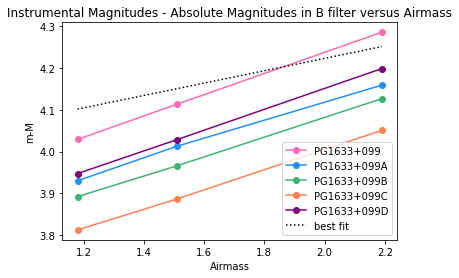

extinction coefficient for B: 0.1481532452241637


In [84]:
plt.plot(airmass_b,pg_ob-abs_mbo,color='hotpink',label='PG1633+099',marker='o')
plt.plot(airmass_b,pg_ab-abs_mba,color='dodgerblue',label='PG1633+099A',marker='o')
plt.plot(airmass_b,pg_bb-abs_mbb,color='mediumseagreen',label='PG1633+099B',marker='o')
plt.plot(airmass_b,pg_cb-abs_mbc,color='coral',label='PG1633+099C',marker='o')
plt.plot(airmass_b,pg_db-abs_mbd,color='purple',label='PG1633+099D',marker='o')
# calculate extinction coefficient:
m83avg = np.mean([mag_83o-abs_mbo,mag_83a-abs_mba,mag_83b-abs_mbb,mag_83c-abs_mbc,mag_83d-abs_mbd])  
m204avg = np.mean([mag_204o-abs_mbo,mag_204a-abs_mbb,mag_204b-abs_mbb,mag_204c-abs_mbc,mag_204d-abs_mbd]) 
m239avg = np.mean([mag_239o-abs_mbo,mag_239a-abs_mba,mag_239b-abs_mbb,mag_239c-abs_mbc,mag_239d-abs_mbd]) 
extinc_coeff_b, bb = np.polyfit(airmass_b,np.array([m83avg,m204avg,m239avg]),deg=1)
plt.plot(airmass_b, extinc_coeff_b*airmass_b+bb,linestyle='dotted',color='k',label='best fit')
plt.xlabel('Airmass')
plt.ylabel('m-M')
plt.title('Instrumental Magnitudes - Absolute Magnitudes in B filter versus Airmass')
plt.legend()
plt.show()
print('extinction coefficient for B:', extinc_coeff_b)

### R Filter

In [85]:
# b frames with 4 different airmasses
data87 = fits.open(reduced_dir+'a087otzb.fits')[0].data   # x = 1.18
data136 = fits.open(reduced_dir+'a136otzb.fits')[0].data  # x = 1.24
data208 = fits.open(reduced_dir+'a208otzb.fits')[0].data  # x = 1.53
data243 = fits.open(reduced_dir+'a243otzb.fits')[0].data  # x = 2.23

airmass_r = np.array([1.18,1.24,1.53,2.23])

In [86]:
# load an image and zscale
#i = 243
#viewer.load_fits(reduced_dir + 'a' + str(i) + 'otzb.fits')
#viewer.scale()

In [87]:
# run imexam
# holding the mouse over a star and pressing 
# 'r' will return the results of a radial plot
#viewer.imexam()

In [88]:
# a087, x = 1.18
print('Frame a087')

bkg83, bkg83a, bkg83b, bkg83c, bkg83d = 112.47, 111.01, 151.64, 143.95, 124.87

# PG1633+099
o_position_83 = [(988.7272,1049.8628)]
ts_83o, snr_83o = snr(o_position_83,8,data87,bkg83,n_r)
rs_83o = rs(ts_83o,10,2)
flux_83o = flux(rs_83o,1,1180,115,6250)
mag_87o = mag(flux_83o,3064)
print('PG1633+099: ',mag_87o)

# PG1633+099A
a_position_83 = [(1044.6470,1043.8324)]
ts_83a, snr_83a = snr(a_position_83,8,data87,bkg83a,n_r)
rs_83a = rs(ts_83a,10,2)
flux_83a = flux(rs_83a,1,1180,115,6250)
mag_87a = mag(flux_83a,3064)
print('PG1633+099A: ',mag_87a)

# PG1633+099B
b_position_83 = [(1251.4666,1221.9080)]
ts_83b, snr_83b = snr(b_position_83,8,data87,bkg83b,n_r)
rs_83b = rs(ts_83b,10,2)
flux_83b = flux(rs_83b,1,1180,115,6250)
mag_87b = mag(flux_83b,3064)
print('PG1633+099B:',mag_87b)

# PG1633+099C
c_position_83 = [(1363.7783,1231.5034)]
ts_83c, snr_83c = snr(c_position_83,8,data87,bkg83c,n_r)
rs_83c = rs(ts_83c,10,2)
flux_83c = flux(rs_83c,1,1180,115,6250)
mag_87c = mag(flux_83c,3064)
print('PG1633+099C:',mag_87c)

# PG1633+099D
d_position_83 = [(1443.8081,1182.5492)]
ts_83d, snr_83d = snr(d_position_83,8,data87,bkg83d,n_r)
rs_83d = rs(ts_83d,10,2)
flux_83d = flux(rs_83d,1,1180,115,6250)
mag_87d = mag(flux_83d,3064)
print('PG1633+099D:',mag_87d)

Frame a087
PG1633+099:  17.772619489488438
PG1633+099A:  18.127627690762957
PG1633+099B: 15.757298988566257
PG1633+099C: 15.988530480727139
PG1633+099D: 16.707478931151442


In [89]:
# a136, x = 2.23
print('Frame a136')

bkg83, bkg83a, bkg83b, bkg83c, bkg83d = 99.94, 96.01, 132.05, 123.63, 109.63

# PG1633+099
o_position_83 = [(931.5163,1044.2382)]
ts_83o, snr_83o = snr(o_position_83,8,data136,bkg83,n_r)
rs_83o = rs(ts_83o,10,2)
flux_83o = flux(rs_83o,1,1180,115,6250)
mag_136o = mag(flux_83o,3064)
print('PG1633+099: ',mag_136o)

# PG1633+099A
a_position_83 = [(987.3934,1038.1242)]
ts_83a, snr_83a = snr(a_position_83,8,data136,bkg83a,n_r)
rs_83a = rs(ts_83a,10,2)
flux_83a = flux(rs_83a,1,1180,115,6250)
mag_136a = mag(flux_83a,3064)
print('PG1633+099A: ',mag_136a)

# PG1633+099B
b_position_83 = [(1194.2610,1216.2219)]
ts_83b, snr_83b = snr(b_position_83,8,data136,bkg83b,n_r)
rs_83b = rs(ts_83b,10,2)
flux_83b = flux(rs_83b,1,1180,115,6250)
mag_136b = mag(flux_83b,3064)
print('PG1633+099B:',mag_136b)

# PG1633+099C
c_position_83 = [(1306.5664,1225.7117)]
ts_83c, snr_83c = snr(c_position_83,8,data136,bkg83c,n_r)
rs_83c = rs(ts_83c,10,2)
flux_83c = flux(rs_83c,1,1180,115,6250)
mag_136c = mag(flux_83c,3064)
print('PG1633+099C:',mag_136c)

# PG1633+099D
d_position_83 = [(1386.5527,1176.7377)]
ts_83d, snr_83d = snr(d_position_83,8,data136,bkg83d,n_r)
rs_83d = rs(ts_83d,10,2)
flux_83d = flux(rs_83d,1,1180,115,6250)
mag_136d = mag(flux_83d,3064)
print('PG1633+099D:',mag_136d)

Frame a136
PG1633+099:  17.773897381842648
PG1633+099A:  18.119529281986203
PG1633+099B: 15.757784037018714
PG1633+099C: 15.980517430361916
PG1633+099D: 16.697231491091465


In [90]:
# a208, x = 1.53
print('Frame a208')

bkg83, bkg83a, bkg83b, bkg83c, bkg83d = 105.98, 103.91, 135.66, 128.86, 114.66

# PG1633+099
o_position_83 = [(924.4301,1037.7273)]
ts_83o, snr_83o = snr(o_position_83,8,data208,bkg83,n_r)
rs_83o = rs(ts_83o,10,2)
flux_83o = flux(rs_83o,1,1180,115,6250)
mag_208o = mag(flux_83o,3064)
print('PG1633+099: ',mag_208o)

# PG1633+099A
a_position_83 = [(980.3030,1031.6084)]
ts_83a, snr_83a = snr(a_position_83,8,data208,bkg83a,n_r)
rs_83a = rs(ts_83a,10,2)
flux_83a = flux(rs_83a,1,1180,115,6250)
mag_208a = mag(flux_83a,3064)
print('PG1633+099A: ',mag_208a)

# PG1633+099B
b_position_83 = [(1187.3421,1209.6226)]
ts_83b, snr_83b = snr(b_position_83,8,data208,bkg83b,n_r)
rs_83b = rs(ts_83b,10,2)
flux_83b = flux(rs_83b,1,1180,115,6250)
mag_208b = mag(flux_83b,3064)
print('PG1633+099B:',mag_208b)

# PG1633+099C
c_position_83 = [(1299.6309,1218.9211)]
ts_83c, snr_83c = snr(c_position_83,8,data208,bkg83c,n_r)
rs_83c = rs(ts_83c,10,2)
flux_83c = flux(rs_83c,1,1180,115,6250)
mag_208c = mag(flux_83c,3064)
print('PG1633+099C:',mag_208c)

# PG1633+099D
d_position_83 = [(1379.6208,1169.9547)]
ts_83d, snr_83d = snr(d_position_83,8,data208,bkg83d,n_r)
rs_83d = rs(ts_83d,10,2)
flux_83d = flux(rs_83d,1,1180,115,6250)
mag_208d = mag(flux_83d,3064)
print('PG1633+099D:',mag_208d)

Frame a208
PG1633+099:  17.79464957104709
PG1633+099A:  18.152136030141964
PG1633+099B: 15.791221589399997
PG1633+099C: 16.012684055574148
PG1633+099D: 16.72104871723977


In [91]:
# a243, x = 2.23
print('Frame a243')

bkg83, bkg83a, bkg83b, bkg83c, bkg83d = 134.07, 130.83, 169.96, 162.83, 144.67

# PG1633+099
o_position_83 = [(837.3626,1040.7888)]
ts_83o, snr_83o = snr(o_position_83,8,data243,bkg83,n_r)
rs_83o = rs(ts_83o,10,2)
flux_83o = flux(rs_83o,1,1180,115,6250)
mag_243o = mag(flux_83o,3064)
print('PG1633+099: ',mag_243o)

# PG1633+099A
a_position_83 = [(893.1543,1034.7043)]
ts_83a, snr_83a = snr(a_position_83,8,data243,bkg83a,n_r)
rs_83a = rs(ts_83a,10,2)
flux_83a = flux(rs_83a,1,1180,115,6250)
mag_243a = mag(flux_83a,3064)
print('PG1633+099A: ',mag_243a)

# PG1633+099B
b_position_83 = [(1099.8202,1212.3659)]
ts_83b, snr_83b = snr(b_position_83,8,data243,bkg83b,n_r)
rs_83b = rs(ts_83b,10,2)
flux_83b = flux(rs_83b,1,1180,115,6250)
mag_243b = mag(flux_83b,3064)
print('PG1633+099B:',mag_243b)

# PG1633+099C
c_position_83 = [(1211.9555,1221.7941)]
ts_83c, snr_83c = snr(c_position_83,8,data243,bkg83c,n_r)
rs_83c = rs(ts_83c,10,2)
flux_83c = flux(rs_83c,1,1180,115,6250)
mag_243c = mag(flux_83c,3064)
print('PG1633+099C:',mag_243c)

# PG1633+099D
d_position_83 = [(1291.7977,1172.7929)]
ts_83d, snr_83d = snr(d_position_83,8,data243,bkg83d,n_r)
rs_83d = rs(ts_83d,10,2)
flux_83d = flux(rs_83d,1,1180,115,6250)
mag_243d = mag(flux_83d,3064)
print('PG1633+099D:',mag_243d)

Frame a243
PG1633+099:  17.905724743848932
PG1633+099A:  18.26289113046962
PG1633+099B: 15.892441032708613
PG1633+099C: 16.121168389787947
PG1633+099D: 16.841467067098982


In [92]:
pg_or = np.array([mag_87o,mag_136o,mag_208o,mag_243o])  
pg_ar = np.array([mag_87a,mag_136a,mag_208a,mag_243a])
pg_br = np.array([mag_87b,mag_136b,mag_208b,mag_243b])
pg_cr = np.array([mag_87c,mag_136c,mag_208c,mag_243c])
pg_dr = np.array([mag_87d,mag_136d,mag_208d,mag_243d])

In [93]:
abs_mro = np.array([14.397+0.093])
abs_mra = np.array([15.256-0.505])
abs_mrb = np.array([12.969-0.590])
abs_mrc = np.array([13.299-0.618])
abs_mrd = np.array([13.691-0.324])

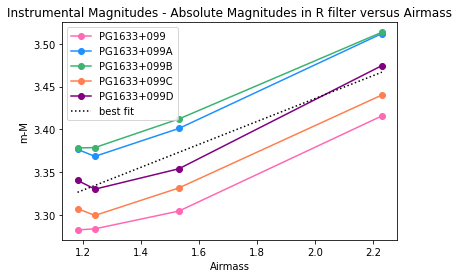

extinction coefficient for R: 0.13361296480500118


In [94]:
plt.plot(airmass_r,pg_or-abs_mro,color='hotpink',label='PG1633+099',marker='o')
plt.plot(airmass_r,pg_ar-abs_mra,color='dodgerblue',label='PG1633+099A',marker='o')
plt.plot(airmass_r,pg_br-abs_mrb,color='mediumseagreen',label='PG1633+099B',marker='o')
plt.plot(airmass_r,pg_cr-abs_mrc,color='coral',label='PG1633+099C',marker='o')
plt.plot(airmass_r,pg_dr-abs_mrd,color='purple',label='PG1633+099D',marker='o')
# calculate extinction coefficient:
m87avg = np.mean([mag_87o-abs_mro,mag_87a-abs_mra,mag_87b-abs_mrb,mag_87c-abs_mrc,mag_87d-abs_mrd]) 
m136avg = np.mean([mag_136o-abs_mro,mag_136a-abs_mra,mag_136b-abs_mrb,mag_136c-abs_mrc,mag_136d-abs_mrd]) 
m208avg = np.mean([mag_208o-abs_mro,mag_208a-abs_mra,mag_208b-abs_mrb,mag_208c-abs_mrc,mag_208d-abs_mrd]) 
m243avg = np.mean([mag_243o-abs_mro,mag_243a-abs_mra,mag_243b-abs_mrb,mag_243c-abs_mrc,mag_243d-abs_mrd]) 
extinc_coeff_r, rb = np.polyfit(airmass_r,np.array([m87avg,m136avg,m208avg,m243avg]),deg=1)
#extinc_coeff_r, rb = np.polyfit(airmass_r,pg_dr-abs_mrd,deg=1)
plt.plot(airmass_r, extinc_coeff_r*airmass_r+rb,linestyle='dotted',color='k',label='best fit')
plt.xlabel('Airmass')
plt.ylabel('m-M')
plt.title('Instrumental Magnitudes - Absolute Magnitudes in R filter versus Airmass')
plt.legend()
plt.show()
print('extinction coefficient for R:', extinc_coeff_r)

## 7: After extinction correcting your standard stars to zero airmasses (i.e., you’re correcting to the top of the atmosphere), make a plot of the difference between real magnitudes and instrumental magnitudes using your standard stars as a function of V-R color and B-V color. Fit a linear relation to this trend. The fit gives you your instrumental zero points and the first order color term which let you transform your instrumental photometry to the standard system. Tabulate the instrumental zero point and first order color terms for each band in a neat, digestible way.

In [95]:
# extinction correction for V and B filter:
# V
mc_ov_118 = mag_o - (extinc_coeff * 1.18)
mc_av_118 = mag_a - (extinc_coeff * 1.18)
mc_bv_118 = mag_b - (extinc_coeff * 1.18)
mc_cv_118 = mag_c - (extinc_coeff * 1.18)
mc_dv_118 = mag_d - (extinc_coeff * 1.18)

mc_ov_124 = mag_134o - (extinc_coeff * 1.24)
mc_av_124 = mag_134a - (extinc_coeff * 1.24)
mc_bv_124 = mag_134b - (extinc_coeff * 1.24)
mc_cv_124 = mag_134c - (extinc_coeff * 1.24)
mc_dv_124 = mag_134d - (extinc_coeff * 1.24)

mc_ov_152 = mag_206o - (extinc_coeff * 1.52)
mc_av_152 = mag_206a - (extinc_coeff * 1.52)
mc_bv_152 = mag_206b - (extinc_coeff * 1.52)
mc_cv_152 = mag_206c - (extinc_coeff * 1.52)
mc_dv_152 = mag_206d - (extinc_coeff * 1.52)

mc_ov_221 = mag_241o - (extinc_coeff * 2.21)
mc_av_221 = mag_241a - (extinc_coeff * 2.21)
mc_bv_221 = mag_241b - (extinc_coeff * 2.21)
mc_cv_221 = mag_241c - (extinc_coeff * 2.21)
mc_dv_221 = mag_241d - (extinc_coeff * 2.21)

# B
mc_ob_118 = mag_83o - (extinc_coeff_b * 1.18)
mc_ab_118 = mag_83a - (extinc_coeff_b * 1.18)
mc_bb_118 = mag_83b - (extinc_coeff_b * 1.18)
mc_cb_118 = mag_83c - (extinc_coeff_b * 1.18)
mc_db_118 = mag_83d - (extinc_coeff_b * 1.18)

mc_ob_124 = mag_132o - (extinc_coeff_b * 1.24)
mc_ab_124 = mag_132a - (extinc_coeff_b * 1.24)
mc_bb_124 = mag_132b - (extinc_coeff_b * 1.24)
mc_cb_124 = mag_132c - (extinc_coeff_b * 1.24)
mc_db_124 = mag_132d - (extinc_coeff_b * 1.24)

mc_ob_151 = mag_204o - (extinc_coeff_b * 1.51)
mc_ab_151 = mag_204a - (extinc_coeff_b * 1.51)
mc_bb_151 = mag_204b - (extinc_coeff_b * 1.51)
mc_cb_151 = mag_204c - (extinc_coeff_b * 1.51)
mc_db_151 = mag_204d - (extinc_coeff_b * 1.51)

mc_ob_221 = mag_239o - (extinc_coeff_b * 2.19)
mc_ab_221 = mag_239a - (extinc_coeff_b * 2.19)
mc_bb_221 = mag_239b - (extinc_coeff_b * 2.19)
mc_cb_221 = mag_239c - (extinc_coeff_b * 2.19)
mc_db_221 = mag_239d - (extinc_coeff_b * 2.19)

In [96]:
# get v-r values
v_r_true = np.array([-0.093,0.505,0.590,0.618,0.324])
v118_mreal_minstr = np.array([abs_mvo-mc_ov_118,abs_mva-mc_av_118,abs_mvb-mc_bv_118,abs_mvc-mc_cv_118,abs_mvd-mc_dv_118])
v124_mreal_minstr = np.array([abs_mvo-mc_ov_124,abs_mva-mc_av_124,abs_mvb-mc_bv_124,abs_mvc-mc_cv_124,abs_mvd-mc_dv_124])
v151_mreal_minstr = np.array([abs_mvo-mc_ov_152,abs_mva-mc_av_152,abs_mvb-mc_bv_152,abs_mvc-mc_cv_152,abs_mvd-mc_dv_152])
v221_mreal_minstr = np.array([abs_mvo-mc_ov_221,abs_mva-mc_av_221,abs_mvb-mc_bv_221,abs_mvc-mc_cv_221,abs_mvd-mc_dv_221])

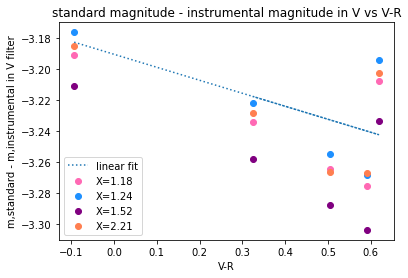

In [97]:
# plot m_standard - m_instrumental in V vs. V-R 
plt.scatter(v_r_true,v118_mreal_minstr,color='hotpink',label='X=1.18',marker='o')
plt.scatter(v_r_true,v124_mreal_minstr,color='dodgerblue',label='X=1.24',marker='o')
plt.scatter(v_r_true,v151_mreal_minstr,color='purple',label='X=1.52',marker='o')
plt.scatter(v_r_true,v221_mreal_minstr,color='coral',label='X=2.21',marker='o')
color_term_vr, instr_0_vr = np.polyfit(v_r_true,v124_mreal_minstr,deg=1)
plt.plot(v_r_true,color_term_vr*v_r_true+instr_0_vr,linestyle='dotted',label='linear fit')
plt.xlabel('V-R')
plt.ylabel('m,standard - m,instrumental in V filter')
plt.title('standard magnitude - instrumental magnitude in V vs V-R')
plt.legend()
plt.show()

In [98]:
# get b-v values
b_v_true = np.array([-0.192,0.873,1.081,1.134,0.535])
b118_mreal_minstr = np.array([abs_mbo-mc_ob_118,abs_mba-mc_ab_118,abs_mbb-mc_bb_118,abs_mbc-mc_cb_118,abs_mbd-mc_db_118])
b124_mreal_minstr = np.array([abs_mbo-mc_ob_124,abs_mba-mc_ab_124,abs_mbb-mc_bb_124,abs_mbc-mc_cb_124,abs_mbd-mc_db_124])
b152_mreal_minstr = np.array([abs_mbo-mc_ob_151,abs_mba-mc_ab_151,abs_mbb-mc_bb_151,abs_mbc-mc_cb_151,abs_mbd-mc_db_151])
b221_mreal_minstr = np.array([abs_mbo-mc_ob_221,abs_mba-mc_ab_221,abs_mbb-mc_bb_221,abs_mbc-mc_cb_221,abs_mbd-mc_db_221])

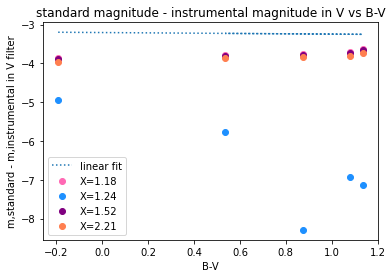

In [99]:
# plot m_standard - m_instrumental in V vs. B-V 
plt.scatter(b_v_true,b118_mreal_minstr,color='hotpink',label='X=1.18',marker='o')
plt.scatter(b_v_true,b124_mreal_minstr,color='dodgerblue',label='X=1.24',marker='o')
plt.scatter(b_v_true,b152_mreal_minstr,color='purple',label='X=1.52',marker='o')
plt.scatter(b_v_true,b221_mreal_minstr,color='coral',label='X=2.21',marker='o')
color_term_bv, instr_0_bv = np.polyfit(b_v_true,v118_mreal_minstr,deg=1)
plt.plot(b_v_true,color_term_bv*b_v_true+instr_0_bv,linestyle='dotted',label='linear fit')
plt.xlabel('B-V')
plt.ylabel('m,standard - m,instrumental in V filter')
plt.title('standard magnitude - instrumental magnitude in V vs B-V')
plt.legend()
plt.show()

In [100]:
print('color term for V-R: ', color_term_vr, '; instrumental zero point: ', instr_0_vr)
print('color term for B-V: ', color_term_bv, '; instrumental zero point: ', instr_0_bv)

color term for V-R:  [-0.08372722] ; instrumental zero point:  [-3.19051302]
color term for B-V:  [-0.04048492] ; instrumental zero point:  [-3.2066186]


## 8: Using the extinction terms and color terms derived for the imaging dataset previously, do photometry on the stars in NGC6823 and make a color magnitude diagram of this open cluster and compare it to a published one. Either V vs. B-V or R vs. R-I are the most common ones you might find, but there may be others. Assess in a paragraph semi-quantitatively how well does your data agree with published data? Note that your data may be affected by interstellar extinction, so you may need to deredden your data to better match the published CMD, if the published CMD has been corrected already. Use a paper such as Cardelli, Clayton, & Mathis (1989) to do the dereddening.

In [101]:
ngc_v = fits.open(reduced_dir+'a159otzb.fits')[0].data
ngc_b = fits.open(reduced_dir+'a160otzb.fits')[0].data

In [102]:
# calculate mean, median, and std
mean_v, median_v, std_v = sigma_clipped_stats(ngc_v, sigma=3.0)  
mean_b, median_b, std_b = sigma_clipped_stats(ngc_b, sigma=3.0) 

# find all the sources in the v and b image
daofind_v = DAOStarFinder(fwhm=3.0, threshold=5.*std_v)  
daofind_b = DAOStarFinder(fwhm=3.0, threshold=5.*std_b)
v_sources = daofind_v(ngc_v - median_v) 
b_sources = daofind_b(ngc_b - median_b) 

In [103]:
for col in v_sources.colnames:  
    v_sources[col].info.format = '%.8g'
for col in b_sources.colnames:  
    b_sources[col].info.format = '%.8g'

In [104]:
# define star positions
v_positions = np.transpose((v_sources['xcentroid'], v_sources['ycentroid']))
b_positions = np.transpose((v_sources['xcentroid'], v_sources['ycentroid']))

# define apertures and annulus
v_apertures = CircularAperture(v_positions, r=8.)
b_apertures = CircularAperture(b_positions, r=8.)
v_annulus = CircularAnnulus(v_positions, r_in=8., r_out=10.)
b_annulus = CircularAnnulus(b_positions, r_in=8., r_out=10.)

# apply photometry
v_aps = [v_apertures,v_annulus]
b_aps = [b_apertures,b_annulus]

# photometry table 
v_phot_table_ap = aperture_photometry(ngc_v, v_aps)
b_phot_table_ap = aperture_photometry(ngc_b, b_aps)

# calculate background counts
v_bkg_mean = v_phot_table_ap['aperture_sum_1'] / v_annulus.area 
v_bkg_counts = v_bkg_mean * v_apertures.area
b_bkg_mean = b_phot_table_ap['aperture_sum_1'] / b_annulus.area 
b_bkg_counts = b_bkg_mean * b_apertures.area

# calculate magnitudes
# V
v_total_counts = v_phot_table_ap['aperture_sum_0']
v_total_signal = v_total_counts - v_bkg_counts
v_count_rate = v_total_signal / 12  # exp time = 12 sec
v_photon_rate = v_count_rate * 2
v_flux_ph_s = v_photon_rate / (1*980*np.pi*(115**2))
v_e_ph = (6.624e-27 * 3e18) / 5380
v_flux_erg_s_ang = v_flux_ph_s * v_e_ph
v_hz_ang = 3e18 / (5380**2)
v_flux_erg_s_hz = v_flux_erg_s_ang / v_hz_ang
v_flux_jy = v_flux_erg_s_hz / 10e-23
v_ngc_mag = -2.5*np.log10(v_flux_jy/3640)
#print(v_ngc_mag)

# B
b_total_counts = b_phot_table_ap['aperture_sum_0']
b_total_signal = b_total_counts - b_bkg_counts
b_count_rate = b_total_signal / 12  # exp time = 12 sec
b_photon_rate = b_count_rate * 2
b_flux_ph_s = b_photon_rate / (1*980*np.pi*(115**2))
b_e_ph = (6.624e-27 * 3e18) / 4350
b_flux_erg_s_ang = b_flux_ph_s * b_e_ph
b_hz_ang = 3e18 / (4350**2)
b_flux_erg_s_hz = b_flux_erg_s_ang / b_hz_ang
b_flux_jy = b_flux_erg_s_hz / 10e-23
b_ngc_mag = -2.5*np.log10(b_flux_jy/3640)
#print(b_ngc_mag)

<ipython-input-104-10f78df1cb51>:37: RuntimeWarning: invalid value encountered in log10
  v_ngc_mag = -2.5*np.log10(v_flux_jy/3640)
<ipython-input-104-10f78df1cb51>:51: RuntimeWarning: invalid value encountered in log10
  b_ngc_mag = -2.5*np.log10(b_flux_jy/3640)


In [105]:
# correct for extinction using color term and instrumental zero point determined in #7. 
v_stand = v_ngc_mag + instr_0_bv + color_term_bv*(b_ngc_mag-v_ngc_mag) 
b_stand = b_ngc_mag + instr_0_bv + color_term_bv*(b_ngc_mag-v_ngc_mag) 

In [106]:
# calculate the extinction from SDFmap
ra, dec = "19h43m09s", "+23d18m00s"
c = SkyCoord(ra,dec).galactic
dustdir = '/Users/hannahdattilo/Desktop/old classes/ASTR8020/ASTR8020/dattilo/week4/sfddata'
m = sfdmap.SFDMap(dustdir, scaling=1)
ebv = m.ebv(c.l.value,c.b.value,frame='galactic')
wave = np.array([4350., 5380.])
A = extinction.fitzpatrick99(wave, 3.1*ebv)
print('Extinction for [B,V]: ',A)

Extinction for [B,V]:  [47.32513671 36.07268108]


In [107]:
# NOTE: these extinction values are ridiculous, I'm going to ignore them

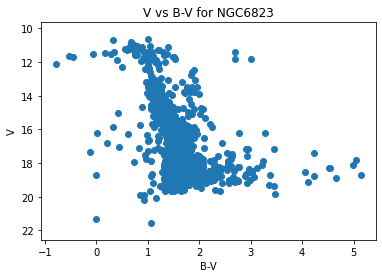

In [108]:
# color magnitude diagram 
ngc_b_v = np.array([b_stand-v_stand])
plt.scatter(ngc_b_v,np.array([v_stand]))
plt.ylim(max(v_stand)+1, min(v_stand)-1)
plt.xlabel('B-V')
plt.ylabel('V')
plt.title('V vs B-V for NGC6823')
plt.show()

Clearly, something went wrong here. The plot above shows the NGC6823 object to be red but published papers show that NGC6823 is blue, specifically, -0.35 < B_V < -0.05. There are a lot of steps I could've done better here to get a more accurate response, these are listed below: 
1. I should've run some more tests to see which FWHM and threshold would've been best. 
2. I assumed the index values for the B and V magntitudes that came from DAOstarfinder were the same, which is not true. Next time, I need to search for nearby objects based on the positions from one image and match them to positions in another image. 
3. The extinction value from the SDFmap returned something ridiculous, so I ignored it. I need to go back anf fix that so I can properly deredden the object. 